# Programming for Data Analytics Big Project  - Magnificent Seven Stock Price Analysis

This assignment is an analysis of the well-known **'Magnificent Seven'** technology companies that dominate the S&P 500 stock exchange. These are some of the largest technological companies in the world & have historically made up a significant percentage of the S&P 500 market capitalisation. [Magnificent 7 Stocks: What You Need To Know](https://www.investopedia.com/magnificent-seven-stocks-8402262)

| Company        | Ticker |
|---------------|--------|
| Meta Platforms | META   |
| Apple Inc.     | AAPL   |
| Amazon.com     | AMZN   |
| Tesla.Inc         | TSLA   |
| Alphabet Inc.  | GOOG   |
| Nvidia Corporation   | NVDA   | 
| Microsoft Corporation  | MSFT   |  

 
The goal of the assignment is to demonstrate tools learned in the module such as:  

**Data Acquisition** - Download/ acquire historical data to analyse. We will use **yfinance** to download historic stock data.      
        - **yfinance** is a Python library that helps to access financial data (company stock prices) from Yahoo Finance. [Reference: Geeksforgeeks](https://www.geeksforgeeks.org/machine-learning/what-is-yfinance-library/)

**Data Cleaning & Normalisation** - Review & prepare the data prior to analysis.  

**Exploratory Analysis** - Look for trends /patterns in the data, visualise results & provide meaningful insights.

## Notebook Structure
  
Notebook structure follows below format:

- **1. Libraries Imported**  
Import Python libraries required for the project.  

- **2. Data Acquisition**  
We use **yfinance** to download the 'Magnificent Seven' historical stock data.  

- **3. Initial Exploratory Analysis & Cleaning**  
Preparatory checks to ensure datasets are complete & ready for further analysis.   

- **4. Price Analysis (Closing Prices)**  
Analyse & visualise plot of the closing prices.  

- **5. Resampling & Returns Analysis**  
Resample daily price data to monthly, quarterly & yearly frequency & calculate the percentage returns across the periods. We look at summary statistics for monthly returns.   

- **6. Yearly Rate of Return (RoR)**  
Analyse & visualise the yearly percentage returns to compare across the seven stock.  

- **7. Rebased Index Analysis (Base $100)**  
Re-index stock price to 100 for all stocks to allow us analyse cumulative growth. We visualise performance, look at log scales & hypothetical growth from a $100 investment.  

- **8. Correlation Analysis of Monthly Returns**  
Examine the correlation between stocks, visualised with a correlation heatmap.  

- **9. Rolling Average on Apple Stock Prices**  
Look specifically at Apple stock, apply rolling averages across **3,6 & 12 month period** to see trends.  

- **10. Linear Regression on Apple Stock Prices**  
Look specifically at Apple stock, apply linear regression to see if past stock performance can predict future performance.  

- **11. Conclusion**  
Key findings & final thoughts.  


## 1. Libraries Imported

Python libraries are used for the analysis:

In [1]:
# 1. Libraries Imported

# Dates & Times
import datetime as dt

# DataFrames and data manipulation
import pandas as pd

# Yahoo finance data.
import yfinance as yf

# Plotting graphs
import matplotlib.pyplot as plt

# Folder creation + listing files
import os

# Statistical data visualisation
import seaborn as sns

# Numerical computing
import numpy as np

# Machine Learning - Linear Regression
from sklearn.linear_model import LinearRegression


## 2 - Data Acquisition (i)

We will download the dataset from **yfinance** for the **Magnificent Seven** companies, from the **1st Jan 2014** to the **30th Nov 2025**.  
Code & additional commentary are provided below.


```python
df = yf.download("META AAPL AMZN TSLA GOOG NVDA MSFT", start="2014-01-01" ,end='2025-11-30',interval = '1d', group_by='ticker', auto_adjust=True)
```

 - **tickers** - List the company tickers that we need to download pricing information for.
 - **start** - Set the start date - **2014-01-01** we wish to extract the pricing data from.
 - **end** - Set the end date - **2025-11-30** we wish to extract the pricing data from.
 - **interval** - Set the interval time period we want to pull the data from. This can be from 1 minute, hourly, daily up to 3 months - we will use daily pricing data **1d**.
 - **group_by** - Sets the order of the columns(headers) - we group the pricing information by **ticker** first and then by **column**, easier to extract pricing data for one ticker this way. If not stated default is to group by **column** only.
     - This gives a multi-index structure where we have two-level headers:
         - Level 0 - Ticker type (META, AAPL, AMZN, TSLA, GOOG, NVDA, MSFT)
         - level 1 - Price type (Open, High, Low, Close, Volume)
 - **auto_adjust** - This automatically adjusts the pricing data to account for stock splits and dividends. Default if not stated is **True**


In [2]:
# Set up to download stock data for the Magnificent 7 companies from Yahoo Finance
   
df = yf.download("META AAPL AMZN TSLA GOOG NVDA MSFT", start="2014-01-01" ,end='2025-11-30',interval = '1d', group_by='ticker', auto_adjust=True)

# References:
# Yfinance Download -  https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html


[*********************100%***********************]  7 of 7 completed


## 2 - Data Acquisition (ii)
In order to explore the data, we'll save the file to a csv folder, we will use a placeholder for the file name called **'filename'**.

In [3]:
# Comments 2 - Data Acquisition

# Set Filename
filename = "Magnificent 7 Stock Price History - Jan 2015- Nov 2025.csv"

# Save to CSV
df.to_csv(filename)

# 3(i) - Initial Exploratory Analysis & Cleaning

We will perform an initial exploratory analysis by viewing the first five rows **df.head()**, last five rows **df.tail()** & use **df.info** to show the index range, columns count & names - we also display non-null values & the datatype

- **df.head()** & **df.tail()** show a clear visual of MultiIndex structure - with level 0 **Ticker** (META, AAPL, MSFT,...) & level 1 **Price** (Open, High, Low,...) data shown.
    The data suggests a significant increase in adjusted prices between the opening five rows (early January 2014 pricing) and the last five rows (late November 2025 pricing). As an example, **Meta's** adjusted opening price on the 2nd January 2014 was **54.44 (rounded)** and had increased to **635.56 (rounded)** by the 28th November 2025.

- **df.info()** displays key information about the dataset:
    - Confirms a pandas DataFrame structure - **<class 'pandas.core.frame.DataFrame'>**.
    - Confirms a DatetimeIndex with 2996 days of price data, ranging from January 2nd 2014 to 28th Novemeber 2025 - **DatetimeIndex: 2996 entries, 2014-01-02 to 2025-11-28**.
    - Confirms 35 columns and the columns naming convention in a MultiIndex structure that we saw initially, also using df.head() & df.tail().
    - Confirms non-null values with **Non-Null Count** & that our data types is floats & integers for pricing information.  

       **See image below with df.info() information for first two stocks shown.**

    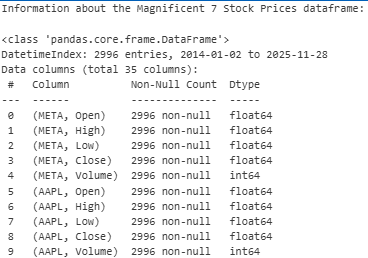


In [4]:
# 3 - Initial Exploratory Analysis & Cleaning

# Display the first 5 rows of the DataFrame
print("First 5 rows of the Magnificent Seven Stock Prices DataFrame:\n")
display(df.head())

# Display the last 5 rows of the DataFrame
print("Last 5 rows of the Magnificent Seven Stock Prices DataFrame:\n")
display(df.tail())

# Info about the DataFrame
print("Information about the Magnificent Seven Stock Prices DataFrame:\n")
df.info()


First 5 rows of the Magnificent Seven Stock Prices DataFrame:



Ticker           TSLA                                                 AAPL  \
Price            Open       High       Low      Close    Volume       Open   
Date                                                                         
2014-01-02   9.986667  10.165333  9.770000  10.006667  92826000  17.235799   
2014-01-03  10.000000  10.146000  9.906667   9.970667  70425000  17.148328   
2014-01-06  10.000000  10.026667  9.682667   9.800000  80416500  16.670343   
2014-01-07   9.841333  10.026667  9.683333   9.957333  75511500  16.883434   
2014-01-08   9.923333  10.246667  9.917333  10.085333  92448000  16.712533   

Ticker                                                  ...       MSFT  \
Price            High        Low      Close     Volume  ...       Open   
Date                                                    ...              
2014-01-02  17.277672  17.122275  17.156704  234684800  ...  30.988764   
2014-01-03  17.174382  16.762780  16.779840  392467600  ...  30.864324   
2014-01-06  16.960355  16.550925  16.871336  412610800  ...  30.573921   
2014-01-07  16.934302  16.684922  16.750679  317209200  ...  30.142499   
2014-01-08  16.921901  16.708813  16.856766  258529600  ...  29.868701   

Ticker                                                     NVDA            \
Price            High        Low      Close    Volume      Open      High   
Date                                                                        
2014-01-02  31.030251  30.781343  30.831125  30632200  0.375278  0.376693   
2014-01-03  30.880918  30.366511  30.623714  31134800  0.374571  0.375278   
2014-01-06  30.607109  29.959955  29.976549  43603700  0.373157  0.377164   
2014-01-07  30.275248  30.042934  30.208872  35802800  0.378107  0.381879   
2014-01-08  29.984856  29.520234  29.669575  59971700  0.381879  0.387536   

Ticker                                     
Price            Low     Close     Volume  
Date                                       
2014-01-02  0.370564  0.373864  260092000  
2014-01-03  0.368207  0.369385  259332000  
2014-01-06  0.369621  0.374335  409492000  
2014-01-07  0.375514  0.380464  333288000  
2014-01-08  0.380464  0.385650  308192000  

[5 rows x 35 columns]

Last 5 rows of the Magnificent Seven Stock Prices DataFrame:



Ticker            TSLA                                                 \
Price             Open        High         Low       Close     Volume   
Date                                                                    
2025-11-21  402.320007  402.799988  383.760010  391.089996  100460600   
2025-11-24  402.170013  421.720001  401.089996  417.779999   96806400   
2025-11-25  414.420013  420.480011  405.950012  419.399994   71915600   
2025-11-26  423.950012  426.940002  416.890015  426.579987   63463000   
2025-11-28  426.589996  432.929993  426.200012  430.170013   36252900   

Ticker            AAPL                                                ...  \
Price             Open        High         Low       Close    Volume  ...   
Date                                                                  ...   
2025-11-21  265.950012  273.329987  265.670013  271.489990  59030800  ...   
2025-11-24  270.899994  277.000000  270.899994  275.920013  65585800  ...   
2025-11-25  275.269989  280.380005  275.250000  276.970001  46914200  ...   
2025-11-26  276.959991  279.529999  276.630005  277.549988  33431400  ...   
2025-11-28  277.260010  279.000000  275.989990  278.850006  20135600  ...   

Ticker            MSFT                                                \
Price             Open        High         Low       Close    Volume   
Date                                                                   
2025-11-21  478.500000  478.920013  468.269989  472.119995  31769200   
2025-11-24  475.000000  476.899994  468.019989  474.000000  34421000   
2025-11-25  474.070007  479.149994  464.890015  476.989990  28019800   
2025-11-26  486.309998  488.309998  481.200012  485.500000  25709100   
2025-11-28  487.600006  492.630005  486.649994  492.010010  14386700   

Ticker            NVDA                                                 
Price             Open        High         Low       Close     Volume  
Date                                                                   
2025-11-21  181.229910  184.549717  172.920360  178.870041  346926200  
2025-11-24  179.480013  183.489785  176.470171  182.539841  256618300  
2025-11-25  174.900263  178.150082  169.540561  177.810104  320600300  
2025-11-26  181.619888  182.899816  178.230078  180.249954  183852000  
2025-11-28  179.000025  179.280009  176.490171  176.990143  121332800  

[5 rows x 35 columns]

Information about the Magnificent Seven Stock Prices DataFrame:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2996 entries, 2014-01-02 to 2025-11-28
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (TSLA, Open)    2996 non-null   float64
 1   (TSLA, High)    2996 non-null   float64
 2   (TSLA, Low)     2996 non-null   float64
 3   (TSLA, Close)   2996 non-null   float64
 4   (TSLA, Volume)  2996 non-null   int64  
 5   (AAPL, Open)    2996 non-null   float64
 6   (AAPL, High)    2996 non-null   float64
 7   (AAPL, Low)     2996 non-null   float64
 8   (AAPL, Close)   2996 non-null   float64
 9   (AAPL, Volume)  2996 non-null   int64  
 10  (AMZN, Open)    2996 non-null   float64
 11  (AMZN, High)    2996 non-null   float64
 12  (AMZN, Low)     2996 non-null   float64
 13  (AMZN, Close)   2996 non-null   float64
 14  (AMZN, Volume)  2996 non-null   int64  
 15  (META, Open)    2996 non-null   float64


## 3 (ii) - Initial Exploratory Analysis & Cleaning

**df.isnull().sum()** is also used to confirm if missing null values present. This checks each column for null entries & returns the count. This method focuses purely on identifying missing data and can be used in conjunction with **df.info()** which is a more high-level overview of all key information.
We see 0 returned which gives us confidence to proceed with further analysis of the dataset.
It was expected that no non-null values would be present - yfinance excludes non-trading days - it is still important to verify the dataset before proceeding with further analysis, as this may not always be the case with other datasets.

**References:**    
Pandas isnull() - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html  
Pandas sum() - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html

In [5]:
# 3(ii) - Initial Exploratory Analysis & Cleaning

# check for null values
df.isnull().sum()
# There are no null values in the DataFrame


Ticker  Price 
TSLA    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
AAPL    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
AMZN    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
META    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
GOOG    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
MSFT    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
NVDA    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

## 4 - Price Analysis (Closing Prices)

We will now perform an initial analysis of the closing price data for the **Magnificent Seven** stocks. To do this, we extract the closing prices from our DataFrame and assign them to a new variable **closing_prices**. 

Assigning the data to a variable rather than referencing individual stock tickers directly is good practice, as this allows us to easily expand/amend the stock ticker company information that we wish to analyse.

As we have a MultiIndex DataFrame, we cannot directly access the closing prices using **df['Close']**.  
We will use **df.xs()**, this allows us to return a specified section of the DataFrame.

i) We extract the 'Close' price from the DataFrame.

```python
# Get closing prices only from multiindex DataFrame
closing_prices= df.xs('Close', level=1, axis=1) 

# Display the first 5 rows of the DataFrame
print("First 5 rows of the Magnificent 7 Closing Prices dataframe:\n")
closing_prices.head()
```
We use **closing_prices.head()** to verify the columns are as expected which they are as multi-index has been flattened.

**References:**  
[Pandas User Guide – Advanced MultiIndexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-multiindexing)    
[W3Schools: pandas DataFrame xs() Method.](https://www.w3schools.com/python/pandas/ref_df_xs.asp)


In [6]:
# 4 - Price Analysis (Closing Prices)


# Get closing prices only from multiindex DataFrame
closing_prices= df.xs('Close', level=1, axis=1) 

# Display the first 5 rows of the DataFrame
print("First 5 rows of the Magnificent 7 Closing Prices DataFrame:\n")
closing_prices.head()                              
                                                                                

First 5 rows of the Magnificent 7 Closing Prices DataFrame:



Ticker,TSLA,AAPL,AMZN,META,GOOG,MSFT,NVDA
Date,,,,,,,
2014-01-02,10.006667,17.156704,19.898500,54.330482,27.517696,30.831125,0.373864
2014-01-03,9.970667,16.779840,19.822001,54.181530,27.316959,30.623714,0.369385
2014-01-06,9.800000,16.871336,19.681499,56.803215,27.621529,29.976549,0.374335
2014-01-07,9.957333,16.750679,19.901501,57.518219,28.154022,30.208872,0.380464
2014-01-08,10.085333,16.856766,20.096001,57.826069,28.212608,29.669575,0.385650


## 4 - Price Analysis (Closing Prices)

ii)
We will now plot the closing prices for the seven stocks across the time horizon, January 2014 - November 2025 to see the price movements.

### **Analysis**
This plot shows that all seven stocks have had long-term growth over the period (**January 2014 to November 2025**). 
Due to different pricing levels for each stock, it is difficult to directly compare performance on a price basis alone. From the plot, **Meta** has the highest price but not necessarily the highest growth across the period, which is what investors would look to when analysing a stock's performance.

In the following steps, we will **re-sample the data** to monthly, quarterly & yearly samples to calculate **stock percentage returns**, and **re-indexing the price series** to allow a more accurate comparison across the companies.

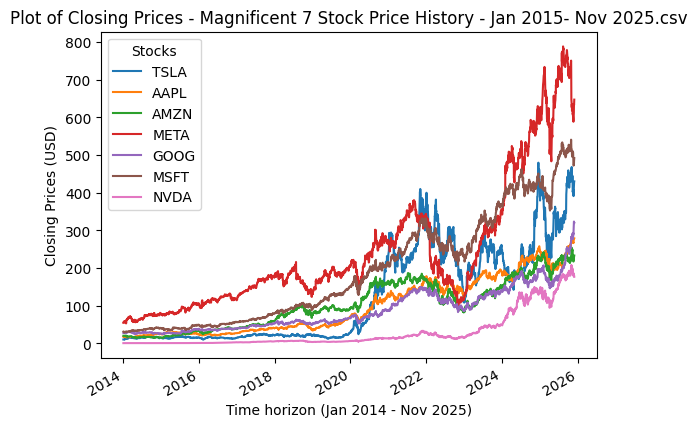

In [7]:
# Comment 4 - Price Analysis (Closing Prices)

#Create new figure and axis
fig, ax = plt.subplots()                                                            # References: Matplotlib subplots - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

# Plot closing prices
closing_prices.plot(ax=ax)

# Labels xlabel and ylabel
ax.set_xlabel("Time horizon (Jan 2014 - Nov 2025)")
ax.set_ylabel("Closing Prices (USD)")

#Title
ax.set_title(f"Plot of Closing Prices - {filename}" )

#Legend
ax.legend(title="Stocks", loc="best")

# Show plot
plt.show()


## 5 - Resampling & returns Analysis

Thus far, we have examined the daily prices of the **Magnificent Seven** stocks, but financial performance, particularly for hedge funds and asset managers, is typically reported to investors on a monthly, quarterly or yearly basis rather than daily. We will **resample** the daily data to monthly, quarterly & yearly frequencies so we can further analyse. This more closely reflects a real-world financial reporting scenario (e.g., a hedge fund) & this frequency reduces the noise from daily fluctuations on the stock and allows investors to see the rate of return (ROR) month on month.

We will now:

1. Resample the data to Monthly, Quarterly & Yearly samples from our initial DataFrame downloaded
2. Extract the closing prices only once the data is resampled
3. Calculate the rate of return/stock percentage return across the different samples to give a more accurate comparison.

## Step 1 - Resample data

**Pandas resampling**  allows us to customise the time periods for our data into smaller time periods - we will convert the data from daily to (i) **Monthly (month-end prices)** ; (ii) **Quarterly (quarter-end prices)** ; (iii) **Yearly (year-end prices)**.   
[Reference: Pandas User Guide – Time Series Resampling](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling)


See below:

```python
# Resample - Daily to Month/Quarter/Year End pricing
month_end_pricing = df.resample('BME').last()                   
quarter_end_pricing = df.resample('BQE').last() 
yearly_end_pricing = df.resample('BYE').last() 
```
 - **BME/BQE/BYE** is used to group the rows into monthly/quarterly/yearly data. **'B'** represents **Business**, which is applied to Month/Quarter/Yearly End
 - **.last()** is used to select the final prices in the resampled grouped period(s) (monthly/quarterly/yearly)


## Step 2 - Extract Closing Prices only from resampled data

Our data is now grouped as per the above resampled period (**Step 1**),& we are displaying **Open, High, Low, Close, Volume** pricing data grouped per each applicable stock.
We now want to extract **Close** pricing information for each stock.
We use the resampled data for the periods (monthly/quarterly/yearly) to now extract the **Close** price only using **.xs**. This allows us to return a specified section of the DataFrame.


 - **'close'** - this is the key parameter we want **'close'**
 - **level=1** - give us access to the price column as it is a multi-level index. level=0 would be the tickers.
 - ***axis=1** - points to the columns rather than the default=0 which is the rows. **'close'** is not present in the rows.

```python
# Get closing prices only of resampled data
monthly_close = month_end_pricing.xs('Close', level=1, axis=1)
quarterly_close = quarter_end_pricing.xs('Close', level=1, axis=1)
yearly_close = yearly_end_pricing.xs('Close', level=1, axis=1)
```


## Step 3 - Get % change of returns across the periods (closing prices)

Our data is now grouped with the closing prices only for our resampled periods. We will now get the percentage change between each period & the previous period.
The same code methodology is applied to monthly, quarterly & yearly figures -  **yearly code only detailed below**.

    a) 

 -**.pct_change** method  ) is used to show the percentage change between each row - current row - and the previous row. This allows us to see an increase/decrease in stock performance across the Month/Quarter/Yearly resampled closing price periods.
 [Reference: Pandas DataFrame pct_change() method — W3Schools.](https://www.w3schools.com/python/pandas/ref_df_pct_change.asp)

 - Variable is called **yearly_returns**
 -***100** - we multiply by 100 to convert to percentage terms from decimals, as easier to view change in percentage terms , also mirrors real-life scenario comparisons.

```python
# Yearly:
yearly_returns = yearly_close.pct_change()*100
```
    b)
We need to add code to account for the performance in 2014, as initially this will return **NaN** as there is no prior year to compare returns to using the **pct_change()** method, data would start from 2015 in that case.

 - **yearly_close.iloc[0]** - is the first year-end closing price (YE 2014)
 - **closing_prices.iloc[0]** - is the first available daily closing price (2nd January 2014)
 - Obtain the closing price for the opening year **yearly_close.iloc[0]**and divide it by the daily closing price **closing_prices.iloc[0]**. Subtract by 1 to get the decimal return of the stock in the year.
 - -**100** - We multiply by 100 to convert to % terms from decimals as easier to view the change in % terms, also mirrors real life scenario comparisons.
  

```python
yearly_returns.iloc[0] = ((yearly_close.iloc[0] / closing_prices.iloc[0]) - 1) * 100            # Multiply by 100 as to get percentage returns - decimals hard to easily read
```
    c)

We assign updated code to the same variable **yearly_returns** & round the percentage to two decimal places for easier readability. Standard in hedge fund reporting is typically to two places.

```python
yearly_returns = yearly_returns.round(2)
```



These time horizons are how hedge fund performance & rate of return is presented in marketing materials to existing investors & prospective investors, allowing for easier comparison across the industry.


In [8]:
# Month-end closing prices - standard in industry to use month end prices for analysis
# References:
# Pandas Resample - https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling
# Pandas Offset Aliases - https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

# Resample - Daily to Month/Quarter/Year End pricing
month_end_pricing = df.resample('BME').last()                   # Used Business month end(BME) rather than month end (ME) as stocks open on business days only, accounted for in yfinance data already
quarter_end_pricing = df.resample('BQE').last() 
yearly_end_pricing = df.resample('BYE').last()  


# Get closing prices only of resampled data
monthly_close = month_end_pricing.xs('Close', level=1, axis=1)
quarterly_close = quarter_end_pricing.xs('Close', level=1, axis=1)
yearly_close = yearly_end_pricing.xs('Close', level=1, axis=1)

# pct_change()= % change between current & previous row
# https://www.w3schools.com/python/pandas/ref_df_pct_change.asp

# Calculate Monthly/Quarterly/Yearly Returns
# Monthly:
monthly_returns = monthly_close.pct_change()*100                                       # Multiply by 100 as to get percentage returns - decimals hard to easily read
monthly_returns.iloc[0] = ((monthly_close.iloc[0] / closing_prices.iloc[0]) - 1)*100  # First month return calculation as pct_change() gives NaN for first row
monthly_returns = monthly_returns.round(2)                                              # Round to 2 decimal places for easier reading

# Quarterly:
quarterly_returns = quarterly_close.pct_change()*100
quarterly_returns.iloc[0] = ((quarterly_close.iloc[0] / closing_prices.iloc[0]) - 1) * 100
quarterly_returns = quarterly_returns.round(2)


# Yearly:
yearly_returns = yearly_close.pct_change()*100
yearly_returns.iloc[0] = ((yearly_close.iloc[0] / closing_prices.iloc[0]) - 1) * 100
yearly_returns = yearly_returns.round(2)



## 5 - Resampling & Returns Analysis

We use **.describe()** to analyse the results of the **monthly_returns** data. This provides key metrics such as **mean, standard deviation, percentiles and more.**

In [9]:
# 5 - Resampling & returns Analysis

# Display summary statistics of monthly returns
monthly_returns.describe()

Ticker,TSLA,AAPL,AMZN,META,GOOG,MSFT,NVDA
count,143.000000,143.000000,143.000000,143.00000,143.000000,143.000000,143.000000
mean,4.054895,2.261958,2.106503,2.20972,1.973706,2.138182,5.212448
std,17.584627,7.721504,8.741707,9.58238,7.037217,6.123760,12.960129
min,-36.730000,-18.120000,-23.750000,-32.63000,-17.670000,-13.020000,-32.030000
25%,-7.485000,-3.295000,-4.210000,-3.61000,-2.080000,-1.485000,-2.600000
50%,0.850000,2.770000,2.150000,1.76000,1.820000,2.050000,4.360000
75%,12.635000,7.755000,7.485000,8.16000,6.645000,5.980000,12.925000
max,74.150000,21.660000,27.060000,27.16000,20.190000,19.630000,38.540000


## 5 - Resampling & Returns Analysis

We can see from the monthly summary statistics the following:

- **mean** - This shows the average month-on-month return across the period ( Jan 1st 2014 - 30th November 2025)  
     - Monthly average returns are positive for all stocks, with a range between 1.9% - 5.25%.  
     - **Nvidia** has the highest monthly average return with a healthy 5.25% mean return  
     - **Google** has the lowest monthly average return with 1.94%  

- **std** - This shows the **standard deviation** (how much the returns vary) across the period. The higher the standard deviation, the more volatile(risky) the returns.
     - **Tesla (17.58%)** is the most volatile & **Nvidia(12.99%)** is the second most volatile, then **Meta(9.56%)**.
     - **Microsoft(6.14%)** has the lowest/least volatile returns.  

- **min** - This shows the month with the biggest loss month-on-month.  
      - **Tesla (-36.73%)**, **Meta (-32.63%)** & **Nvidia (-32.02%)** have seen the biggest month-on-month loss in the period.  
      - **Microsoft (-13.02%)** had the lowest % loss   
      - This is broadly consistent with stocks that had the highest & lowest standard deviation  

- **25%** - This shows how many of the returns were in the lowest 25% quartile.  
     - **Tesla (-7.58%)**  - This means that 25% of months had returns below -7.58%
     
- **50%** - This shows the median return of the stocks. Median counts the value in the middle & reduces low or high outliers in % returns.  
      - All stock had positive returns, **Nvidia (4.93%)** being the highest  

- **75%** - This shows how many of the returns were in the highest 25% quartile.  
      - **Nvidia (13.04%)** & ***Tesla (12.16%)** had the highest %, 25% of months had returns above **13.04%** & **12.16%** respectively for each company.  

- **max** - This shows the highest % return in the period.  
     - **Tesla (74.14%)** & **Nvidia (38.54%)** had the largest rate of return.  
     - Other stocks performed strongly - **Microsoft (19.62%)** had the lowest growth. 

The **Tesla (74.14%)** max return is a massive outlier for a month-on-month increase. Upon investigation, this was a genuine monthly return and was due to pricing speculation after Tesla announced a 5-for-1 stock split in August 2020.[Tesla stock jump](https://www.cnbc.com/2020/08/31/apple-tesla-jump-as-stock-splits-take-effect.html?msockid=11017dd644a966b708f66faa45d66739)  
A stock split lowers the price of a single share - the value of a share is reduced proportionately to the split - so that investors who were priced out of buying a single stock now may be able to trade the stock due to the reduced price.  

**Tesla** was shown to be the most volatile from the standard deviation of returns(17.58%). This can be seen by the stock leading the way with the biggest loss **(-36.73%)** and the highest return **(74.14%)** 
Investors with a high-risk appetite might favour this stock while investors drawn to more stable returns might prefer **Microsoft**, which had the lowest standard deviation **(6.14%)**; the lowest loss **(-13.02%)** & stable mean **(2.13%)** & median returns **(2.04%)**.


## 6 - Yearly Rate of Return (RoR)


We will now look at **yearly percentage rate of return(RoR)** for each of the Magnificent Seven stocks. 
The table displayed shows the annual RoR for each stock, calculated using the **year-end closing prices**. This was assigned to the variable **yearly_returns** in Step 5.
We then use a plot to visualise the data.

This allows us to:
 - Compare the performance of stocks on a like-for-like basis across years
 - Observe volatility in the performance across different years

 
Using yearly returns removes short-term noise present in daily or monthly data & provides a clearer picture of **long-term investment performance**, which is important for investors & other stakeholders.

Year-on-Year Growth % of the Magnificent 7 Stocks


Ticker,TSLA,AAPL,AMZN,META,GOOG,MSFT,NVDA
Date,,,,,,,
2014-12-31,48.17,42.63,-22.02,42.61,-5.32,28.42,28.68
2015-12-31,7.91,-3.01,117.78,34.15,44.56,22.69,67.12
2016-12-30,-10.97,12.48,10.95,9.93,1.71,15.08,226.96
2017-12-29,45.70,48.46,55.96,53.38,35.58,40.73,81.99
2018-12-31,6.89,-5.39,28.43,-25.71,-1.03,20.80,-30.82
2019-12-31,25.70,88.96,23.03,56.57,29.10,57.56,76.94
2020-12-31,743.44,82.31,76.26,33.09,31.03,42.53,122.30
2021-12-31,49.76,34.65,2.38,23.13,65.17,52.48,125.48
2022-12-30,-65.03,-26.40,-49.62,-64.22,-38.67,-28.02,-50.26


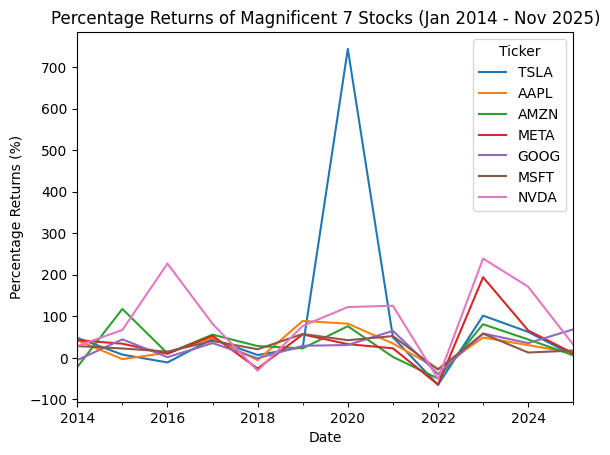

In [10]:
# 6 - Yearly Rate of Return (RoR)

print("Year-on-Year Growth % of the Magnificent 7 Stocks")

# yearly_returns - rounded to 2 decimal places (standard practice for reporting returns)
display(yearly_returns.round(2))


# Plot the percentage returns for each stock over the time period
yearly_returns.plot(title="Percentage Returns of Magnificent 7 Stocks (Jan 2014 - Nov 2025)", ylabel="Percentage Returns (%)", xlabel="Date",)
plt.show()


# 6 - Yearly Rate of Return (RoR) - Analysis

The table & plot show the year-on-year % growth from 2014 through to 2025.

 - Positive long-term performance for each stock, although there have been significant gains & losses.
 - **Tesla** & **Nvidia** have had the largest % gains but also the largest % losses. This shows the high volatility of the stocks.
 - **Tesla** year ending 2020 % gain is a significant outlier. As mentioned in Step 5, this was due to pricing speculation following the announcement of a stock split.
 - **Microsoft** & **Apple** have more stable returns compared to the other stocks.
 - 2022 year-end % returns were negative across all seven stocks. This was driven by high interest rates, high inflation & geopolitical uncertainty due to the Russian invasion of Ukraine. [Reference: CNBC: Stock market futures open to close news, 2022](https://www.cnbc.com/2022/12/29/stock-market-futures-open-to-close-news.html?msockid=11017dd644a966b708f66faa45d66739)
 - Stocks all performed strongly in 2023, showing the volatility of returns & the benefit of long-term investment strategies.

Next, we will re-index the price series to 100 for each stock & look at cumulative returns across the period for a more accurate comparison of performance.


# 7 - Rebased Index Analysis (Base $100)

We will now re-index the price levels to $100 for each stock. This is done as comparing the actual price over a long-term horizon can be misleading, as each stock is priced at a different starting point, & the highest priced stock is not necessarily the best performing stock in the period. By re-indexing to $100, we can compare stocks on a level playing field from the onset & track the cumulative growth through the years.  
[Reference: Stack Overflow – Normalising time series data to a base value (Base 100)](https://stackoverflow.com/questions/61128874/python-timeseries-normalize-scaling-to-base-100)

We will plot & create a table looking at:

i) **Rebased Index - Non-Log Scale**
A rebased index plotted on a standard (linear) scale shows the cumulative growth of each stock from the same starting point. Large differences in growth can cause faster-growing stocks to dominate the chart, making comparisons between other stocks difficult.


ii) **Rebased Index - Log Scale**
To consider this, we also plot the rebased index using a logarithmic scale. Log scales are commonly used when values span a wide range, as equal vertical distances represent equal percentage changes. This allows for clearer visual comparison of relative growth rates across all stocks.  
[Reference: Logarithmic Axes with Matplotlib](https://towardsdatascience.com/plot-logarithmic-axes-matplotlib-python-bb8533f430c0/)


iii) **Growth of $100 investment**
We assess the rebased index in monetary terms by examining the growth of a hypothetical **$100 investment** in each stock from January 2014 to November 2025. This provides an investor's perspective on long-term performance.


<Figure size 1200x600 with 0 Axes>

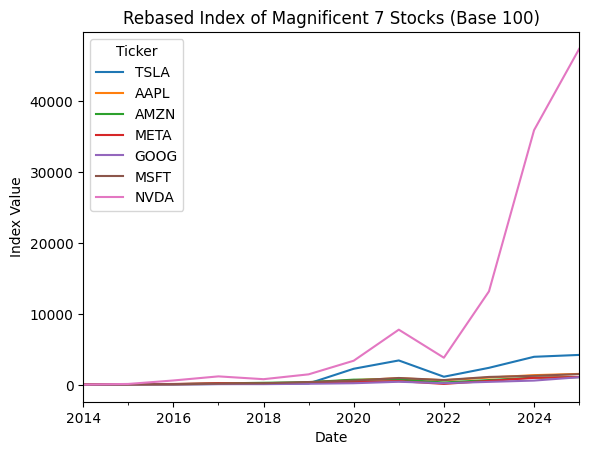

<Figure size 1200x600 with 0 Axes>

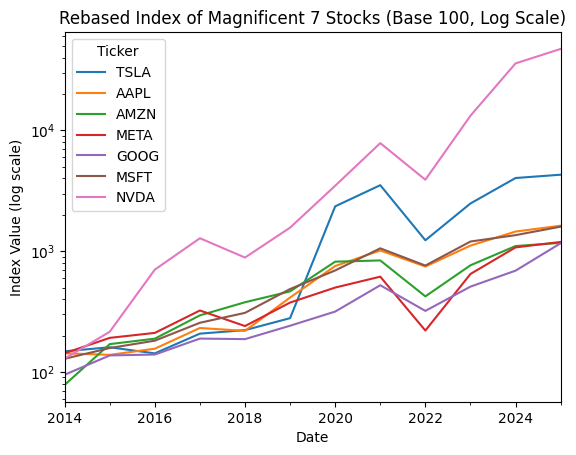

In [11]:
# 7 - Rebased Index Analysis (Base 100) - i& ii

# Rebase all stocks to 100 starting price & get cumulative yearly returns
df_indexed_yearly = 100 * (1 + yearly_returns/100).cumprod()      #Reference: cumprod() function - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cumprod.html

# Plot 
plt.figure(figsize=(12,6))
df_indexed_yearly.plot()
plt.title("Rebased Index of Magnificent 7 Stocks (Base 100)")
plt.ylabel("Index Value")
plt.xlabel("Date")
plt.show()

# Plot on log scale - code adapted from Chatgpt for logscale plot - Reference: https://chatgpt.com/share/69542880-0d10-8005-95e2-76895301c68a
plt.figure(figsize=(12,6))
df_indexed_yearly.plot()
plt.yscale('log')                    # Set y-axis to log scale
plt.title("Rebased Index of Magnificent 7 Stocks (Base 100, Log Scale)")
plt.ylabel("Index Value (log scale)")
plt.xlabel("Date")
plt.legend(title="Ticker")
plt.show()




In [12]:
# 7 - Rebased Index Analysis (Base 100)- iii

# See value of $100 investment at start date vs end date

initial_investment = 100


# Get a table that shows starting investment vs ending investment with % growth for each stock
# Code adapted with assistance from GitHub Copilot
investment_growth = pd.DataFrame({
    'Starting Investment ($)': [initial_investment]*len(df_indexed_yearly.columns),
    'Final Investment ($)': df_indexed_yearly.iloc[-1],           # Final Investment Value
    'Percentage Growth (%)': ((df_indexed_yearly.iloc[-1] - initial_investment) / initial_investment * 100)     
}, index=df_indexed_yearly.columns)


# Sort highest to lowest growth
investment_growth = investment_growth.sort_values(
    by='Percentage Growth (%)',
    ascending=False
)

# Display formatted table (presentation only)
investment_growth.style.format({
    'Starting Investment ($)': '${:,.0f}',
    'Final Investment ($)': '${:,.0f}',
    'Percentage Growth (%)': '{:,.0f}%'
})



,Starting Investment ($),Final Investment ($),Percentage Growth (%)
Ticker,,,
NVDA,$100,"$47,342","47,242%"
TSLA,$100,"$4,299","4,199%"
AAPL,$100,"$1,626","1,526%"
MSFT,$100,"$1,596","1,496%"
META,$100,"$1,192","1,092%"
AMZN,$100,"$1,172","1,072%"
GOOG,$100,"$1,163","1,063%"


## 7 - Rebased Index Analysis (Base $100)

The results were:

i) **Rebased Index - Non Log Scale**  

**Nvidia** has had significantly more growth since 2014 compared to the other Magnificent Seven stocks - this is evident by it dominating the plot. 
**Tesla** also shows strong growth but with noticeably larger fluctuations compared to the more stable upward trajectories of **Apple** and **Microsoft**.

It is difficult to interpret the results clearly for the other stocks, as they appear compressed due to the large scale of the plot. We will look at a log-scale plot.


ii) **Rebased Index - Log Scale**  

The log-scale visually shows a more meaningful plot of the **relative growth rates** across all stocks. On this scale, equal vertical movements represent equal percentage changes, allowing trends to be compared more accurately. 

The log-scale plot confirms **Nvidia’s** outperformance while also revealing that **Apple** and **Microsoft** follow relatively consistent and steady growth paths over the period. **Tesla** shows more volatility, with sharper rises and falls, reflecting the higher risk profile observed earlier in the returns analysis. **Amazon** and **Google** display more moderate but steady long-term growth.

iii) **Growth of $100 investment**

Interpreting the rebased index in dollar terms, the $100 investment analysis demonstrates the impact of compounding returns over time. An initial $100 investment in **Nvidia** grows to a substantially higher final value of **$47,432** than investments in the other stocks, reinforcing its position as the strongest long-term performer. Investments in **Microsoft - ($1,596)** and **Apple - ($1,626)** grew more steadily, resulting in lower but more stable final values. **Google -($1,163)** had the lowest growth in the period.

We will next look at the correlation of the monthly returns for the Magnificent Seven stocks.


## 8 - Correlation Analysis of Monthly Returns


To further understand the relationship between the Magnificent Seven stocks, we look at the **correlation of monthly percentage returns**. Correlation measures how closely stocks move together over time and is a key consideration for asset managers when constructing diversified portfolios. Stocks with a **strong positive correlation** tend to move in sync, meaning that a downturn in one stock is likely to be accompanied by declines in the others, reducing diversification benefits. Strong correlations are often observed among stocks operating within the same sector.

A correlation heatmap is used to visually summarise the **strength and direction** of the relationships between each pair of stocks.

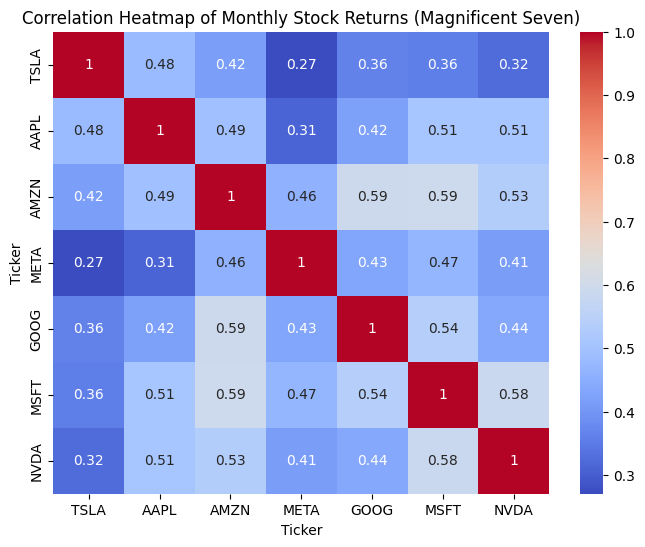

In [13]:
#Correlation between stocks based on monthly returns
correlation_matrix = monthly_returns.corr()

# Plot heatmap of correlation matrix                        Reference: https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap of Monthly Stock Returns (Magnificent Seven)")
plt.show()
 

## 8 - Correlation Analysis of Monthly Returns - Analysis

The correlation heatmap shows positive correlations between all the stocks, although they are not nearly perfectly correlated - a correlation of 1 would be a perfect correlation.

Strongest correlation are seen between 1) **Amazon & Microsoft (0.59)** 2) **Amazon & Google (0.59)** 3) **Microsoft & Nvidia (0.58)** 
As technology stocks that work in the same sphere, this was to be expected.

Lowest correlations are seen between 1) **Tesla & Meta (0.27)** 2) **Apple & Meta (0.31)**
While considered technology stocks, lower correlation can be attributed to the different business models these companies use to generate revenue. For example, ****Tesla** primarily generates revenue from electric vehicle manufacturing, Meta's revenue is driven by social media platforms & advertising.

We can draw from the above that these stocks have an imperfect positive correlation.  

Holding a basket of these stocks provides some diversification benefit; a portfolio held solely with these stocks would be open to a sector-wide downturn. This was evident in **2022**, when all seven stocks had negative annual returns. However, we have seen the seven stocks have string long term performance, so an investor's risk appetite and time horizon would be a key consideration when constructing their portfolio.


## 9 - Rolling Average on Apple Stock Prices

We will narrow our focus to one stock, **Apple**, to see whether historical price trends can predict future prices.

Rolling averages are based on monthly closing prices, as demonstrated in Step 5, instead of daily prices. Using monthly data reduces short-term daily price fluctuations/volatility.

We compute **3-month, 6-month, and 12-month rolling averages** and plot them alongside the actual Apple closing price. By comparing the actual price to the moving averages, we can see if the rolling averages offer us insight into the future direction of Apple's stock prices.


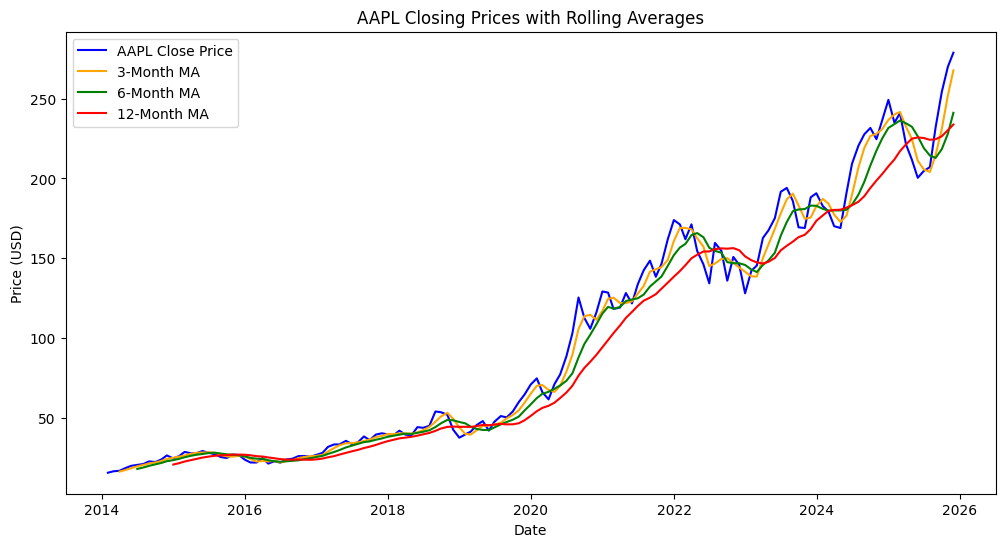

In [14]:
# 9 - Rolling Average on Apple Stock Prices
# Code adapted from lecture notes, GitHub Copilot & References below

# 1. Extract Apple closing prices into a simple DataFrame from our existing monthly_close DataFrame
aapl_monthly = monthly_close[['AAPL']].copy()
aapl_monthly.columns = ['Close']


# 2. Calculate rolling averages for 3/6/12 months periods
aapl_monthly['3_MA'] = aapl_monthly['Close'].rolling(window=3).mean()
aapl_monthly['6_MA'] = aapl_monthly['Close'].rolling(window=6).mean()
aapl_monthly['12_MA'] = aapl_monthly['Close'].rolling(window=12).mean() 

# 3. Plot closing prices and rolling averages for 3/6/12 months periods
plt.figure(figsize=(12, 6))
plt.plot(aapl_monthly['Close'], label='AAPL Close Price', color='blue')
plt.plot(aapl_monthly['3_MA'], label='3-Month MA', color='orange')
plt.plot(aapl_monthly['6_MA'], label='6-Month MA', color='green')
plt.plot(aapl_monthly['12_MA'], label='12-Month MA', color='red')
plt.title('AAPL Closing Prices with Rolling Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()



# References:
# Pandas Rolling - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html
# Pandas Mean - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html
# https://www.geeksforgeeks.org/python/how-does-pandas-rolling-objects-work/

## 9 - Rolling Average on Apple Stock Prices - Analysis

From the plot we can see, as expected, that the shortest period, **3-month rolling average**, closely follows the actual Apple closing price. In 2022, when there was a significant drop in prices, the **3-month rolling average** adjusted fastest to reflect this.

The **6-month & 12-month average** shows medium to longer-term trends of the stock price and has reduced volatility due to the longer time horizon, and smoothing out the shorter term month volatility. By comparison, we would expect daily returns to be significantly more volatile, reflecting more closely the daily movements of stock prices.

The rolling averages have a time lag in predicting stock prices and are reactive rather than proactive in helping us predict future trends. This would differ if we were looking at more
linear trends, such as yearly temperature increases, where averaging can provide more predictive insights into future trends.

## 10 - Linear Regression on Apple Stock Prices

We will narrow our focus to one stock - Apple -  & use linear regression to see if past Apple closing prices can be a predictor of future Apple closing prices. While in reality past returns are not a predictor of future returns (this disclaimer is present in hedge fund marketing materials) - we can test this by doing the following.
We will use daily prices

**1. Get Apple closing price**  
Assign apple stock closing price to it's own DataFrame using **.copy** & re-name the column to **'Close'** as it was multi-indexed.

```python
# 1. Extract Apple closing prices into a simple DataFrame
aapl = df[[('AAPL', 'Close')]].copy()
aapl.columns = ['Close']   # flatten MultiIndex
```

**2. Assign x & y variables**  
x is the time index ( one day per step)
y is the Apple closing price on each day

```python
# 2. Create X (time index) and y (price)
X = np.arange(len(aapl)).reshape(-1, 1)
y = aapl['Close'].values
```

**3. Train/test split of data**  

We assign a variable **'split'** and divide the data between **training(first 80%)** and **testing (last 20%)**


```python
# 3. Time-based split (80/20)
split = int(len(aapl) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
```

**4. Fit Linear Regression estimator**  
We fit a linear regression model to the training data to estimate a linear trend.


```python
# 4. Fit Linear Regression estimator
model = LinearRegression()
model.fit(X_train, y_train)
```


**5. Evaluate**  
We calculate the Coefficient of determination, denoted as r2, which tells us the amount of variation in y (Apple closing prices) that can be explained by the dependence on x (time-index) using the linear regression model.
High R² (close to 1) indicates near perfect fit, while low or negative indicates a poor fit for predicting future prices.

```python
# 5.Evaluate
r2 = model.score(X_test, y_test)
print(f"R² score on test data: {r2:.3f}")
```


**References:**   
[Scikit-learn – LinearRegression documentation.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)  
[Alpharithms: Predicting stock prices with linear regression.](https://www.alpharithms.com/predicting-stock-prices-with-linear-regression-214618/)


In [15]:
# 10 - Linear Regression on Apple Stock Prices

#Adapted code from lecture notes , GitHub Copilot & https://www.alpharithms.com/predicting-stock-prices-with-linear-regression-214618/ 

# 1. Extract Apple closing prices into a simple DataFrame
aapl = df[[('AAPL', 'Close')]].copy()
aapl.columns = ['Close']   # flatten MultiIndex

# 2. Create X (time index) and y (price)
X = np.arange(len(aapl)).reshape(-1, 1)
y = aapl['Close'].values

# 3. Time-based split (80/20)
split = int(len(aapl) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


# 4. Fit Linear Regression estimator
model = LinearRegression()
model.fit(X_train, y_train)

# 5.Evaluate
r2 = model.score(X_test, y_test)
print(f"R² score on test data: {r2:.3f}")


R² score on test data: -1.189


## 10 - Linear Regression on Apple Stock Prices - Analysis

The R² score of **-1.189** indicates that the past performance of **Apple** stock prices is a poor predictor of future prices. As per above, a High R² (close to 1) indicates near perfect fit while a low or negative R² indicates a poor fit for predicting future prices. 

This is expected because price movements are influenced by a wide range of factors, including macroeconomic events (taxes, tariffs, interest rates), company performance (sales numbers, new product launches), and unforeseen “black swan” events such as the COVID-19 pandemic.   
The negative R² also reflects the high volatility in a stock’s daily closing price and shows that a simple linear trend cannot capture these fluctuations.

We plot this for a visual representation. We can see Apple' long term stock price steadily increasing, while price movement is volatile in the short term, which is not visible in the linear regression trend, which continues in a straight line. In the test period, the regression line shows little change while the actual prices fluctuate substantially. This shows that linear regression is a poor predictor of future stock prices.

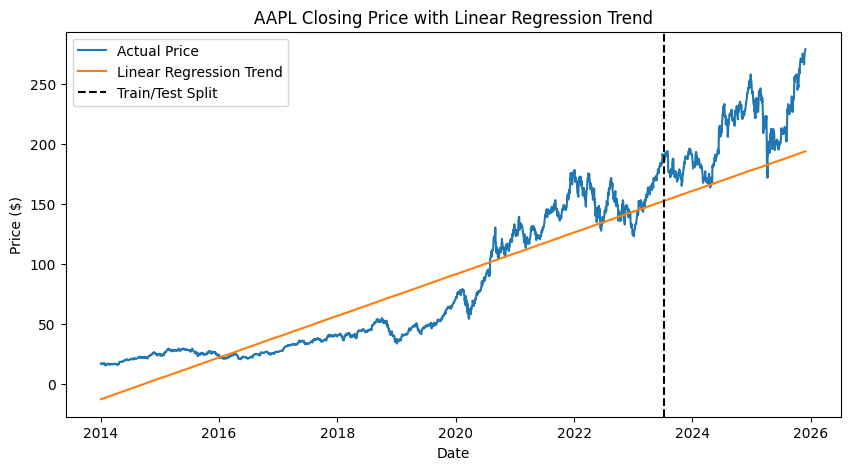

In [16]:
#Adapted code from ChatGpt to improve visualisation of linear regression results
#Reference: For existing code what is best plot to assist with visualising? -  https://chatgpt.com/share/69579f4a-87f8-8005-8de6-e2ef11a4dbb1

# Predict prices for all dates
y_pred = model.predict(X)

# Plot actual prices and regression line
plt.figure(figsize=(10, 5))
plt.plot(aapl.index, y, label='Actual Price')
plt.plot(aapl.index, y_pred, label='Linear Regression Trend')

# Mark train/test split
plt.axvline(aapl.index[split], color='black', linestyle='--', label='Train/Test Split')

plt.title('AAPL Closing Price with Linear Regression Trend')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

## Conclusion

The analysis of the Magnificent Seven stocks' key findings are:

 - All seven stocks had long-term growth from 2014 to 2025.
 - Comparing stocks purely on a price basis made it difficult to determine which stock performed the strongest. However, looking at % growth,
  cumulative returns & the table of the hypothetical $100 investment allowed us to clearly see **Nvidia** was the strongest performing stock across our time horizon.
 - Interestingly, the two strongest performing stocks,**Nvidia & Tesla**, were seen to have the most volatile returns in the period.
  This shows the trade-off between higher potential returns & increased investment risk. 
 - Correlation analysis showed a positive correlation between all seven stocks. While not perfectly correlated, there would be limited diversification benefits in holding the seven stocks, and opens a portfolio to concentration risks with a sector downturn. However, the extremely strong returns generated in the period could challenge traditional portfolio theory for broader diversification.
 - Linear regression confirmed that historical prices are a poor predictor of future prices. This was to be expected as there are many factors
  that impact the movements in stock prices, such as macroeconomic conditions, company performance, and investor sentiment.



End